In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df_csv = pd.read_csv("fct_invoice.csv")
df_csv

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df_json = pd.read_json("dim_customer.json")
df_json

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [5]:
#Easy: How many unique customers are there in the database?

unique_customers = len(df_csv["customer_id"].unique())
print(unique_customers)

5191


In [6]:
#Easy: What are the different categories of products available? How many unique categories are there?

categories = df_csv["category"].unique()
print(categories)

unique_categories = len(df_csv["category"].unique())
print(unique_categories)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [7]:
#Easy: Which payment method is the most popular? How many times was it used?

mop = df_csv["payment_method"].value_counts()
popular = mop.idxmax()
print(popular)

times = max(mop)
print(times)

Cash
44447


In [9]:
#Medium: What are the three most popular categories, by total sales?

df_csv["sales"] = df_csv["quantity"]*df_csv["price"]
sales_category = df_csv.groupby("category").sum()["sales"]
arranged_sales = sales_category.sort_values(ascending = False)
popular_categories=arranged_sales.head(3)
print(popular_categories)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


C:\Users\mirie\AppData\Local\Temp\ipykernel_7964\3782722090.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_category = df_csv.groupby("category").sum()["sales"]


In [10]:
#Medium: What are the total sales attributed to customers over the age of 45?

merged_df=pd.merge(df_csv, df_json, left_on = "customer_id", right_on = "id")
df_45=merged_df[merged_df["age"]>45]
sales_45=df_45["sales"].sum()
print(sales_45)

82039768.15


In [ ]:
#Medium: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [12]:
merged_df["invoice_date"] = pd.to_datetime(merged_df["invoice_date"], format='%d/%m/%Y')
merged_df["year_month"] = merged_df["invoice_date"].dt.strftime('%Y/%m')

print(merged_df)

      invoice_no  customer_id   category  quantity    price payment_method  \
0        I138884          229   Clothing         5  1500.40    Credit Card   
1        I126377          229  Cosmetics         2    81.32    Credit Card   
2        I178419          229      Shoes         3  1800.51     Debit Card   
3        I847727          229   Clothing         3   900.24    Credit Card   
4        I219251          229      Shoes         5  3000.85    Credit Card   
...          ...          ...        ...       ...      ...            ...   
99452    I198027         4973      Shoes         1   600.17           Cash   
99453    I989120         6161      Books         5    75.75           Cash   
99454    I791963         6779   Clothing         5  1500.40    Credit Card   
99455    I100582         8386   Clothing         2   600.16           Cash   
99456    I934204         4761  Cosmetics         4   162.64           Cash   

      invoice_date   shopping_mall     sales   age first_name g

Text(0.5, 1.0, 'Trends in Orders by Month')

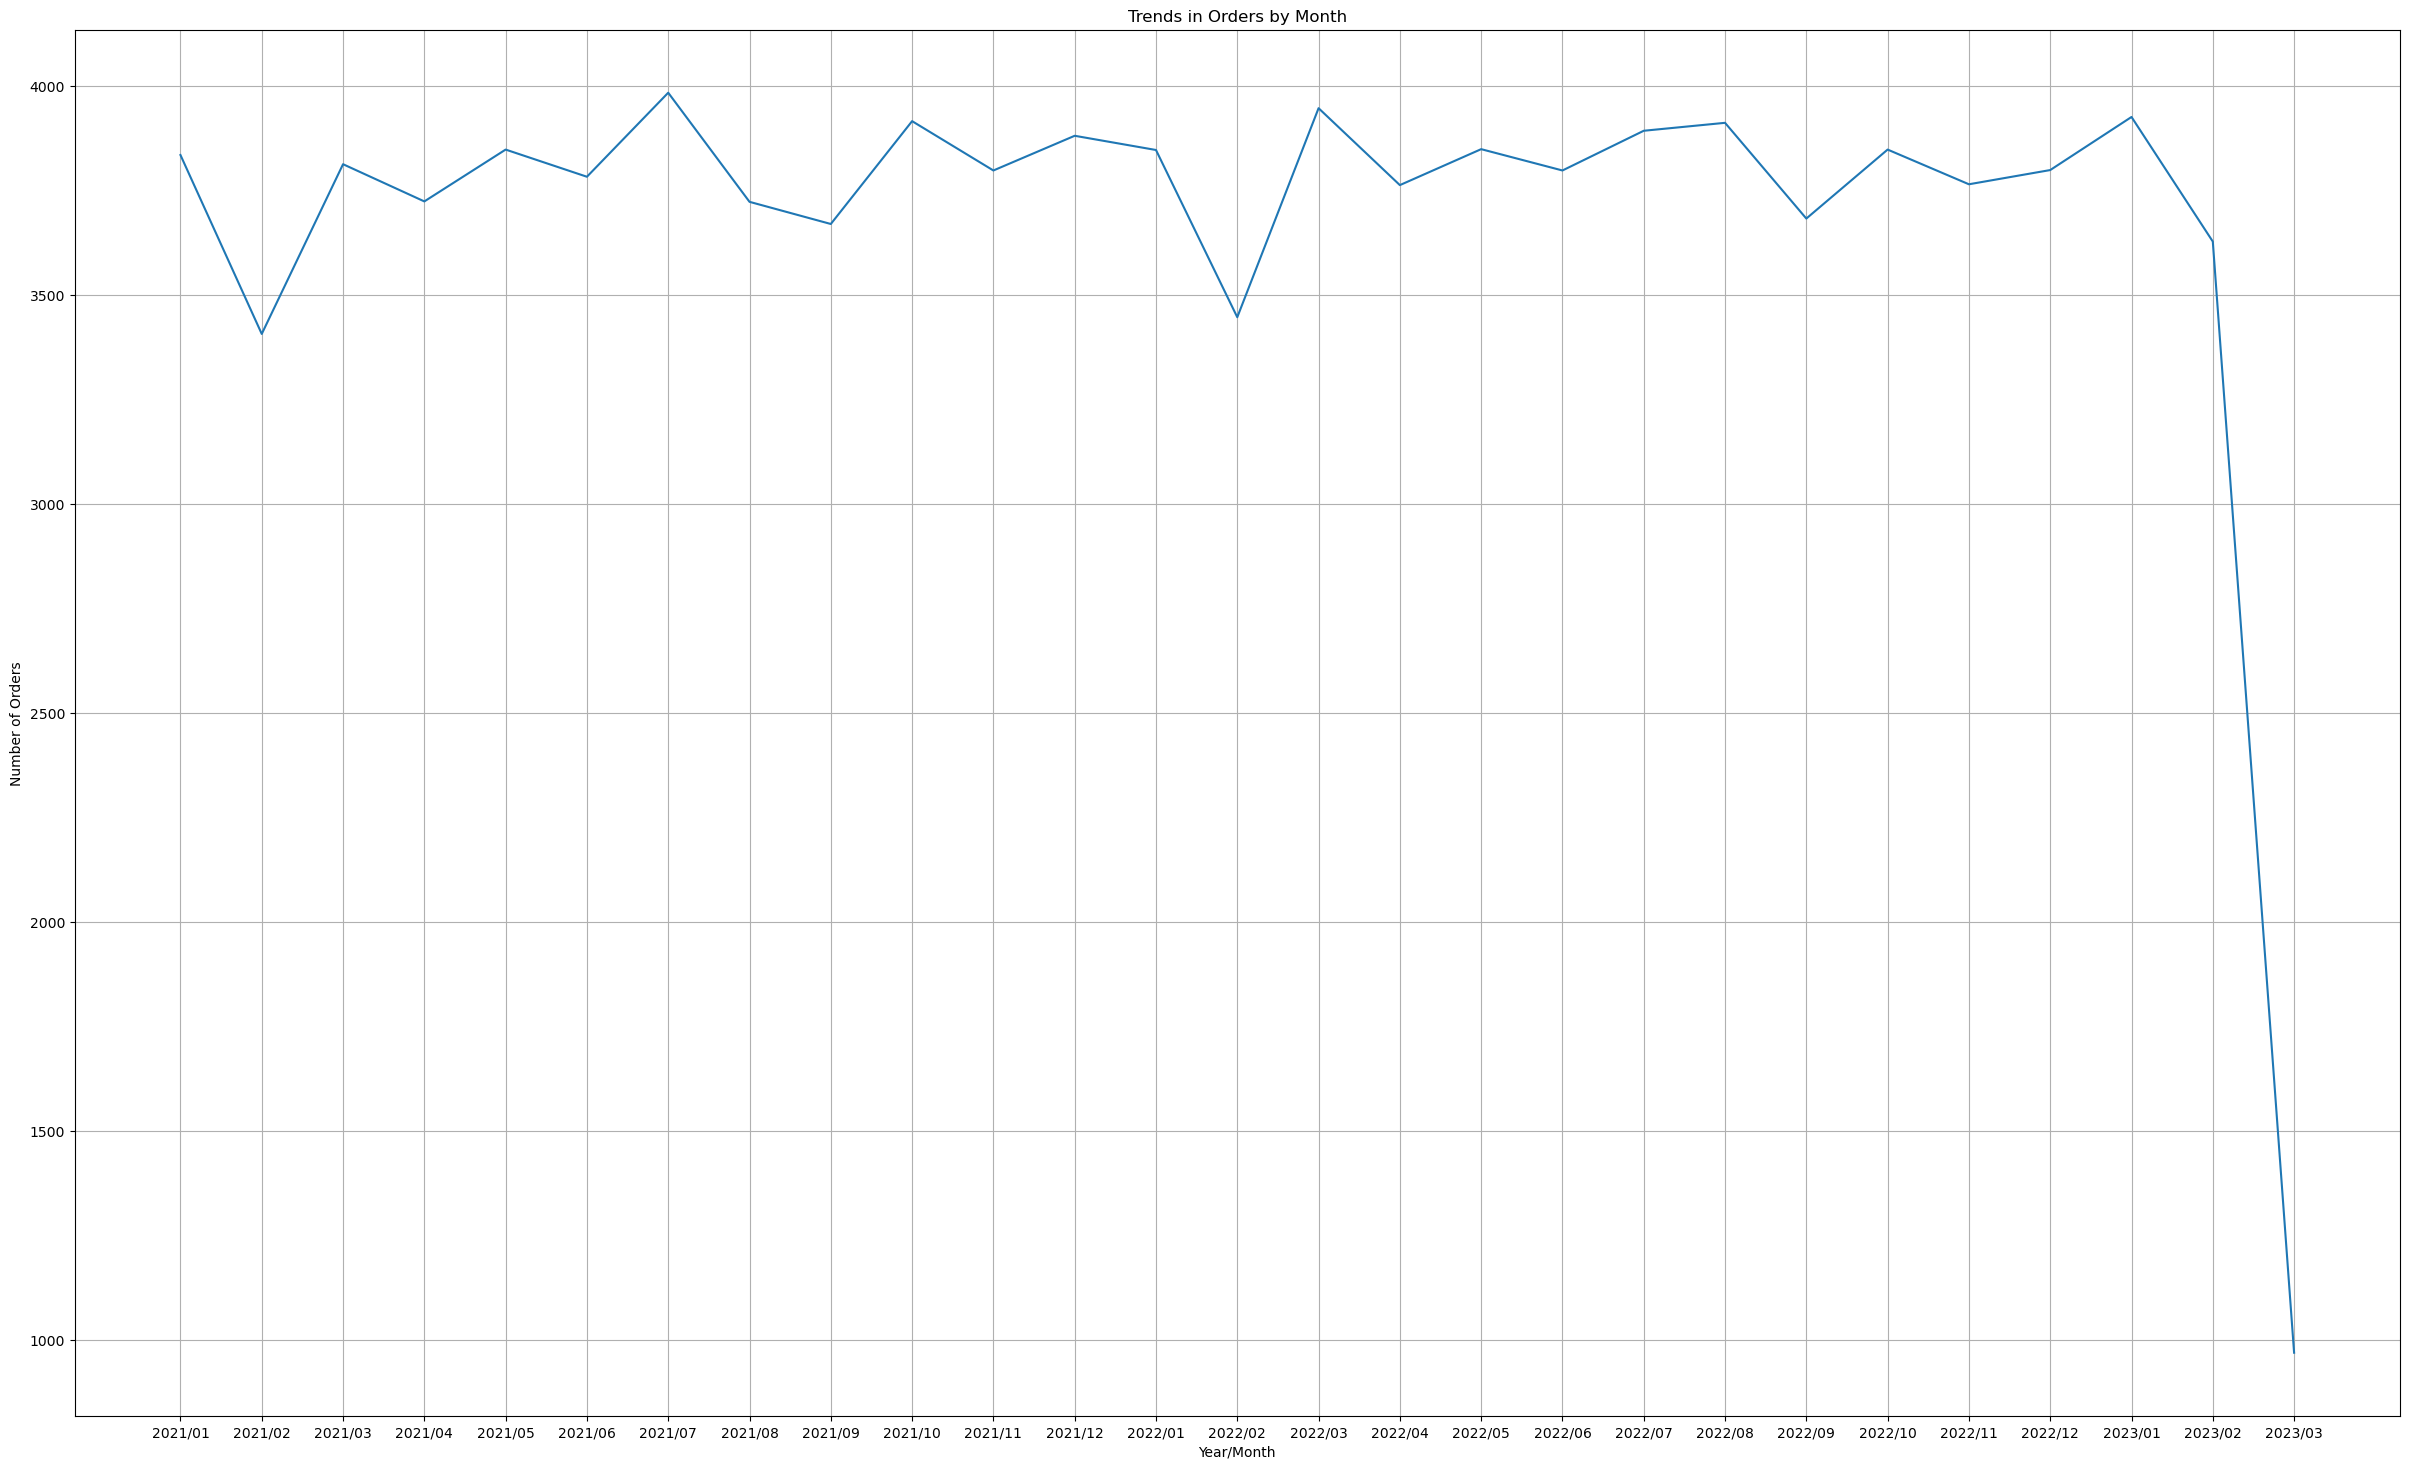

In [13]:
x = merged_df.groupby(["year_month"])
y = merged_df.groupby(["year_month"]).count()["invoice_no"]

x_values = x.groups.keys()
y_values = y.values

plt.figure(figsize=(30, 18))
plt.plot(x_values,y_values)
plt.grid()
plt.xlabel("Year/Month")
plt.ylabel("Number of Orders")
plt.title("Trends in Orders by Month")

Observations: There is a decline from the month of January to February for every year. The month of February also has the least number of orders for these years. The number of orders also gradually increase and decrease until the month of July or August, but another decline is seen when heading toward the month of September in both 2021 and 2022. Finally, for the year 2023, the sharp drop from February to March should be disregarded as the month of March was not yet complete which is why there is a much lower number of sales for March 2023.

In [14]:
merged_df=pd.merge(df_csv[["category","sales"]],df_json[["age"]],left_on=df_csv["customer_id"],right_on=df_json["id"])
age_ranges=[10, 19, 29, 39, 49, 59, 69, 79, 89]
age_groups=["10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
merged_df["age range"]=pd.cut(merged_df["age"],bins=age_ranges,labels=age_groups)
breakdown=merged_df.groupby(["category","age range"])["sales"].sum().reset_index()
pivot_table=breakdown.pivot_table(values="sales", index="category", columns="age range")
pivot_table

age range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
